In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, accuracy_score, confusion_matrix

In [2]:
data=pd.read_csv(r"C:\Users\Dell\Desktop\credit_risk_dataset.csv")

In [3]:
data.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


# Basic Data Information

In [4]:
data.shape

(32581, 12)

In [5]:
data.columns

Index(['person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_default_on_file', 'cb_person_cred_hist_length'],
      dtype='object')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [7]:
data.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


In [8]:
data.isnull().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

In [9]:
emp_median = data['person_emp_length'].median()
data['person_emp_length'] = data['person_emp_length'].fillna(emp_median)
print("Filled missing emp_length with median:", emp_median)

Filled missing emp_length with median: 4.0


In [10]:
int_median = data['loan_int_rate'].median()
data['loan_int_rate'] = data['loan_int_rate'].fillna(int_median)
print("Filled missing loan_int_rate with median:", int_median)

Filled missing loan_int_rate with median: 10.99


In [11]:
data.isnull().sum()

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64

# Cleaned Sucessfully

# the target (loan_status)

In [12]:
print("Counts (0 = good, 1 = default):")
display(data['loan_status'].value_counts())
print("\nPercentages:")
display(data['loan_status'].value_counts(normalize=True).round(3))

Counts (0 = good, 1 = default):


loan_status
0    25473
1     7108
Name: count, dtype: int64


Percentages:


loan_status
0    0.782
1    0.218
Name: proportion, dtype: float64

In [13]:
# Force numeric where expected
for c in ['person_age','person_income','person_emp_length','loan_amnt','loan_int_rate',
          'loan_percent_income','cb_person_cred_hist_length','loan_status']:
    if c in data.columns:
        data[c] = pd.to_numeric(data[c], errors='coerce')

# Make string columns tidy
for c in ['person_home_ownership','loan_intent','loan_grade','cb_person_default_on_file']:
    if c in data.columns:
        data[c] = data[c].astype(str).str.strip().replace('nan','MISSING')
        
# Map Y/N to 1/0 for default-in-file
if 'cb_person_default_on_file' in data.columns:
    data['cb_person_default_on_file'] = data['cb_person_default_on_file'].map({'Y':1,'N':0}).fillna(0).astype(int)

print("Done cleaning types.")

Done cleaning types.


# DTI (Debt-to-Income)

In [14]:
# Use the existing loan_percent_income if division fails
data['dti'] = data['loan_amnt'] / data['person_income'].replace(0, np.nan)
data['dti'] = data['dti'].fillna(data['loan_percent_income'])
print("Sample dti values:")
display(data[['loan_amnt','person_income','loan_percent_income','dti']].head())

Sample dti values:


,loan_amnt,person_income,loan_percent_income,dti
0,35000,59000,0.59,0.593220
1,1000,9600,0.10,0.104167
2,5500,9600,0.57,0.572917
3,35000,65500,0.53,0.534351
4,35000,54400,0.55,0.643382


In [15]:
data['age_group'] = pd.cut(data['person_age'],
                           bins=[0,25,35,50,120],
                           labels=['<25','25-34','35-49','50+'])
display(data[['person_age','age_group']].head())

,person_age,age_group
0,22,<25
1,21,<25
2,25,<25
3,23,<25
4,24,<25


# features and turn categories into numbers

In [16]:
features = [
    'person_age','person_income','person_emp_length','loan_amnt','loan_int_rate',
    'loan_percent_income','cb_person_cred_hist_length','dti',
    'person_home_ownership','loan_intent','loan_grade','age_group','cb_person_default_on_file'
]

# Keep only existing features (safe)
features = [f for f in features if f in data.columns]

X = pd.get_dummies(data[features], drop_first=True)  # turn categories into numbers
y = data['loan_status']

print("Feature matrix shape:", X.shape)
display(X.head().T[:20])  # show first 20 feature rows (transpose for readability)

Feature matrix shape: (32581, 26)


,0,1,2,3,4
person_age,22,21,25,23,24
person_income,59000,9600,9600,65500,54400
person_emp_length,123.0,5.0,1.0,4.0,8.0
loan_amnt,35000,1000,5500,35000,35000
loan_int_rate,16.02,11.14,12.87,15.23,14.27
loan_percent_income,0.59,0.1,0.57,0.53,0.55
cb_person_cred_hist_length,3,2,3,2,4
dti,0.59322,0.104167,0.572917,0.534351,0.643382
cb_person_default_on_file,1,0,0,0,1
person_home_ownership_OTHER,False,False,False,False,False


# Split into train and test

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.20,
                                                    stratify=y,
                                                    random_state=42)
print("Train shape:", X_train.shape, "Test shape:", X_test.shape)
print("Train default rate:", y_train.mean(), "Test default rate:", y_test.mean())

Train shape: (26064, 26) Test shape: (6517, 26)
Train default rate: 0.21815531000613875 Test default rate: 0.21819855761853613


# Logistic Regression

In [18]:
model = LogisticRegression(max_iter=1000, class_weight='balanced', solver='liblinear', random_state=42)
model.fit(X_train, y_train)
print("Model trained.")

Model trained.


# Get predictions and evaluate (AUC + simple accuracy)

In [19]:
probs = model.predict_proba(X_test)[:,1]   # probability of default
preds = (probs >= 0.5).astype(int)        # predicted labels with cutoff 0.5

print("AUC (bigger is better, 0.5 = random):", round(roc_auc_score(y_test, probs), 4))
print("Accuracy at 0.5 cutoff:", round(accuracy_score(y_test, preds), 4))
print("Confusion matrix (rows=true, cols=pred):\n", confusion_matrix(y_test, preds))

AUC (bigger is better, 0.5 = random): 0.8158
Accuracy at 0.5 cutoff: 0.7149
Confusion matrix (rows=true, cols=pred):
 [[3565 1530]
 [ 328 1094]]


#  Model Evaluation — Credit Risk Logistic Regression
#  Metrics Observed

AUC (Area Under Curve): 0.8158

AUC ranges from 0.5 (random guessing) to 1.0 (perfect model).

Our score of 0.82 means the model is quite good at ranking risky borrowers higher than safe ones.

Accuracy (at 0.5 cutoff): 71.5%

About 7 out of 10 predictions are correct.

But accuracy can be misleading in imbalanced datasets (if defaults are rare, the model could get high accuracy by always predicting "no default").

# Confusion Matrix

# Breakdown:

True Negatives (3565): Safe borrowers correctly predicted as safe.

False Positives (1530): Safe borrowers wrongly flagged as default → over-warning.

False Negatives (328): Default borrowers wrongly predicted as safe → risky misses.

True Positives (1094): Default borrowers correctly predicted as default.

# Conclusion

# Interpretation

Strong discriminatory power: With an AUC of ~0.82, the model can effectively separate defaulters from non-defaulters.

Good sensitivity to defaults: The model catches 1094 real defaulters, but still misses 328 (false negatives).

False alarms exist: 1530 safe borrowers were flagged as risky, which might lead to rejecting good customers.

Trade-off exists: If we lower the probability cutoff (e.g., from 0.5 → 0.3), we could reduce false negatives (catch more bad loans) but at the cost of more false positives.

# Enhanced Model for better performance 

In [23]:
numeric_cols = ['person_age', 'person_income', 'person_emp_length', 
                'loan_amnt', 'loan_int_rate', 'loan_percent_income',
                'cb_person_cred_hist_length']

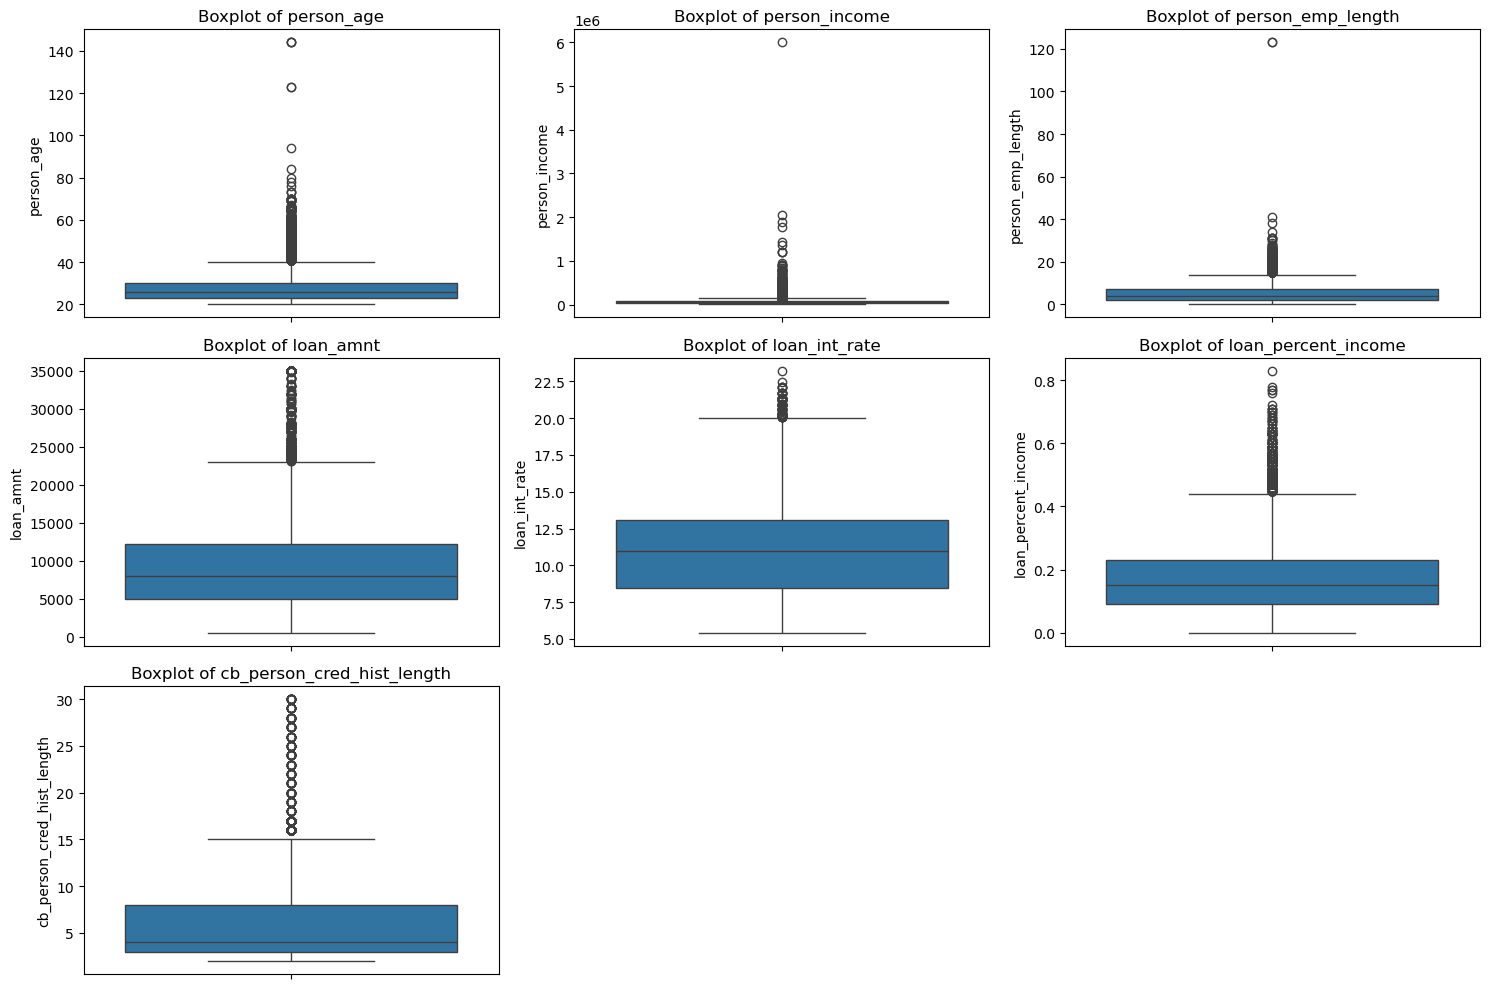

In [26]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(y=data[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

# Detect Outlier Using IQR Function

In [28]:
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers, lower_bound, upper_bound

In [29]:
print("=== OUTLIER ANALYSIS ===")
for col in numeric_cols:
    outliers, lower, upper = detect_outliers_iqr(data, col)
    print(f"{col}: {len(outliers)} outliers ({len(outliers)/len(data)*100:.2f}%) - Range: [{lower:.2f}, {upper:.2f}]")

=== OUTLIER ANALYSIS ===
person_age: 1494 outliers (4.59%) - Range: [12.50, 40.50]
person_income: 1484 outliers (4.55%) - Range: [-22550.00, 140250.00]
person_emp_length: 853 outliers (2.62%) - Range: [-5.50, 14.50]
loan_amnt: 1689 outliers (5.18%) - Range: [-5800.00, 23000.00]
loan_int_rate: 70 outliers (0.21%) - Range: [1.56, 20.04]
loan_percent_income: 651 outliers (2.00%) - Range: [-0.12, 0.44]
cb_person_cred_hist_length: 1142 outliers (3.51%) - Range: [-4.50, 15.50]


#  Treat outliers - Winsorization (cap at 1st and 99th percentiles)

In [30]:
def winsorize_column(series, lower_percentile=0.01, upper_percentile=0.99):
    lower_bound = series.quantile(lower_percentile)
    upper_bound = series.quantile(upper_percentile)
    return series.clip(lower=lower_bound, upper=upper_bound)

In [31]:
columns_to_winsorize = ['person_income', 'person_emp_length', 'loan_amnt']
for col in columns_to_winsorize:
    data[f'{col}_original'] = data[col]  # Keep original values for comparison
    data[col] = winsorize_column(data[col])
    print(f"Winsorized {col} - New range: [{data[col].min():.2f}, {data[col].max():.2f}]")

Winsorized person_income - New range: [14400.00, 225200.00]
Winsorized person_emp_length - New range: [0.00, 17.00]
Winsorized loan_amnt - New range: [1000.00, 29800.00]


C:\Users\Dell\AppData\Local\Temp\ipykernel_1528\1680170428.py:4: FutureWarning: Downcasting behavior in Series and DataFrame methods 'where', 'mask', and 'clip' is deprecated. In a future version this will not infer object dtypes or cast all-round floats to integers. Instead call result.infer_objects(copy=False) for object inference, or cast round floats explicitly. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return series.clip(lower=lower_bound, upper=upper_bound)


In [32]:
print(f"\nBefore age cleaning: {data['person_age'].min()} to {data['person_age'].max()}")
data = data[(data['person_age'] >= 18) & (data['person_age'] <= 100)]
print(f"After age cleaning: {data['person_age'].min()} to {data['person_age'].max()}")
print(f"Rows remaining: {len(data)}")


Before age cleaning: 20 to 144
After age cleaning: 20 to 94
Rows remaining: 32576


# Advanced Feature Engineering (Beyond Basic DTI)

In [33]:
print("Basic DTI already exists:")
print(data[['loan_amnt', 'person_income', 'dti']].head())

Basic DTI already exists:
   loan_amnt  person_income       dti
0      29800          59000  0.593220
1       1000          14400  0.104167
2       5500          14400  0.572917
3      29800          65500  0.534351
4      29800          54400  0.643382


# Additional Financial Ratios

In [34]:
data['income_to_loan_ratio'] = data['person_income'] / data['loan_amnt'].replace(0, np.nan)
data['monthly_loan_payment'] = data['loan_amnt'] * (data['loan_int_rate']/100) / 12
data['payment_to_income_ratio'] = data['monthly_loan_payment'] / (data['person_income']/12).replace(0, np.nan)

# Crefit Utilisation Features

In [35]:
data['credit_age_ratio'] = data['cb_person_cred_hist_length'] / (data['person_age'] - 18).replace(0, np.nan)  # Age since 18
data['emp_to_age_ratio'] = data['person_emp_length'] / data['person_age']

# Risk Flags

In [36]:
data['high_dti_flag'] = (data['dti'] > 0.4).astype(int)  # DTI > 40% is typically risky
data['high_interest_flag'] = (data['loan_int_rate'] > data['loan_int_rate'].median()).astype(int)
data['large_loan_flag'] = (data['loan_amnt'] > data['loan_amnt'].median()).astype(int)
data['young_borrower_flag'] = (data['person_age'] < 25).astype(int)
data['short_employment_flag'] = (data['person_emp_length'] < 2).astype(int)

In [37]:
print("New features created:")
new_features = ['dti', 'income_to_loan_ratio', 'payment_to_income_ratio', 
               'high_dti_flag', 'high_interest_flag', 'young_borrower_flag']
print(data[new_features].head())

New features created:
        dti  income_to_loan_ratio  payment_to_income_ratio  high_dti_flag  \
0  0.593220              1.979866                 0.080915              1   
1  0.104167             14.400000                 0.007736              0   
2  0.572917              2.618182                 0.049156              1   
3  0.534351              2.197987                 0.069291              1   
4  0.643382              1.825503                 0.078170              1   

   high_interest_flag  young_borrower_flag  
0                   1                    1  
1                   1                    1  
2                   1                    0  
3                   1                    1  
4                   1                    1  


# Coorelation of new features

In [38]:
print("\nCorrelation of new features with loan_status:")
new_features_corr = data[new_features + ['loan_status']].corr()['loan_status'].sort_values(ascending=False)
print(new_features_corr)


Correlation of new features with loan_status:
loan_status                1.000000
payment_to_income_ratio    0.448355
dti                        0.385882
high_dti_flag              0.249539
high_interest_flag         0.221569
young_borrower_flag        0.026501
income_to_loan_ratio      -0.177563
Name: loan_status, dtype: float64


# Enhanced Categorical Variable Encoding

In [40]:
# 1. Ordinal Encoding for loan_grade (A=1, B=2, etc.)
grade_order = {'A': 1, 'B': 2, 'C': 3, 'D': 4, 'E': 5, 'F': 6, 'G': 7}
data['loan_grade_encoded'] = data['loan_grade'].map(grade_order)

In [41]:
# 2. Frequency Encoding 
data['loan_intent_freq'] = data['loan_intent'].map(data['loan_intent'].value_counts(normalize=True))
data['home_ownership_freq'] = data['person_home_ownership'].map(data['person_home_ownership'].value_counts(normalize=True))

In [42]:
print("Enhanced encoding examples:")
print(data[['loan_grade', 'loan_grade_encoded', 'loan_intent', 'loan_intent_freq']].head())

Enhanced encoding examples:
  loan_grade  loan_grade_encoded loan_intent  loan_intent_freq
0          D                   4    PERSONAL          0.169450
1          B                   2   EDUCATION          0.198029
2          C                   3     MEDICAL          0.186364
3          C                   3     MEDICAL          0.186364
4          C                   3     MEDICAL          0.186364


# Final Feature Set

In [43]:
#  original features + new engineered features
features = [
    # Original numeric features
    'person_age', 'person_income', 'person_emp_length', 'loan_amnt', 'loan_int_rate',
    'loan_percent_income', 'cb_person_cred_hist_length', 'dti', 'cb_person_default_on_file',
    
    # New engineered features
    'income_to_loan_ratio', 'payment_to_income_ratio', 'credit_age_ratio', 'emp_to_age_ratio',
    'high_dti_flag', 'high_interest_flag', 'large_loan_flag', 'young_borrower_flag', 'short_employment_flag',
    
    # Encoded features
    'loan_grade_encoded', 'loan_intent_freq', 'home_ownership_freq',
    
    # Categorical for one-hot encoding
    'person_home_ownership', 'loan_intent', 'loan_grade', 'age_group'
]

# existing features
features = [f for f in features if f in data.columns]

#  final feature matrix with one-hot encoding
X_enhanced = pd.get_dummies(data[features], drop_first=True)
y_enhanced = data['loan_status']

print(f"Original feature count: {X.shape[1]}")
print(f"Enhanced feature count: {X_enhanced.shape[1]}")
print(f"New features added: {X_enhanced.shape[1] - X.shape[1]}")

Original feature count: 26
Enhanced feature count: 38
New features added: 12


# Train and Compare Enhanced Model

In [44]:
# Split enhanced features
X_train_enh, X_test_enh, y_train_enh, y_test_enh = train_test_split(
    X_enhanced, y_enhanced, test_size=0.2, stratify=y_enhanced, random_state=42
)

# Scale features for logistic regression
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_enh)
X_test_scaled = scaler.transform(X_test_enh)

# Train enhanced model

In [45]:
model_enhanced = LogisticRegression(max_iter=1000, class_weight='balanced', 
                                  random_state=42, solver='liblinear')
model_enhanced.fit(X_train_scaled, y_train_enh)

LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42,
                   solver='liblinear')

# Evaluate enhanced model

In [46]:
probs_enhanced = model_enhanced.predict_proba(X_test_scaled)[:, 1]
preds_enhanced = (probs_enhanced >= 0.5).astype(int)

In [47]:
print("=== PERFORMANCE COMPARISON ===")
print("ORIGINAL MODEL:")
print(f"AUC: {roc_auc_score(y_test, probs):.4f}")
print(f"Accuracy: {accuracy_score(y_test, preds):.4f}")

print("\nENHANCED MODEL:")
print(f"AUC: {roc_auc_score(y_test_enh, probs_enhanced):.4f}")
print(f"Accuracy: {accuracy_score(y_test_enh, preds_enhanced):.4f}")

=== PERFORMANCE COMPARISON ===
ORIGINAL MODEL:
AUC: 0.8158
Accuracy: 0.7149

ENHANCED MODEL:
AUC: 0.8786
Accuracy: 0.8135


# Feature importance from enhanced model

In [48]:
coefficients = pd.DataFrame({
    'feature': X_enhanced.columns,
    'coefficient': model_enhanced.coef_[0]
}).sort_values('coefficient', key=abs, ascending=False)

print("\nTop 10 most important features:")
print(coefficients.head(10))


Top 10 most important features:
                    feature  coefficient
7                       dti     8.346707
5       loan_percent_income    -5.934425
10  payment_to_income_ratio    -0.905195
4             loan_int_rate     0.530662
3                 loan_amnt    -0.486597
18       loan_grade_encoded     0.464245
31             loan_grade_D     0.424030
28      loan_intent_VENTURE    -0.360288
15          large_loan_flag    -0.358029
20      home_ownership_freq     0.274909
